In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [9]:
# valores de parâmetros

mumax = 1.6   # 1/hora #taxa máxima de crescimento específica
Ks = 1.00     # g/litro #constante de saturação
Yxs = 0.8     # g/g #alto coeficiente de rendimento de biomassa (massa celular/massa do substrato limitante)
Sf = 20.0     # g/litro #concentração do substrato de alimentação (feeding stream)
D = 1.00      # 1/hora #taxa de diluição = F(t)/V

# definição de parâmetros

def mu(S):
    return mumax*S/(Ks + S)

def Rg(X,S):
    return mu(S)*X

# equações diferenciais

def xdif(x,t):
    X,S = x
    dX = Rg(X,S)-D*X
    dS = D*(Sf - S) - Rg(X,S)/Yxs
    return [dX,dS]

def xprim(x,u):
    X,S = x
    X = Yxs*(Sf-(Ks*D)/(mumax-D))
    S = Ks*D/(mumax-D)
    return [X,S]

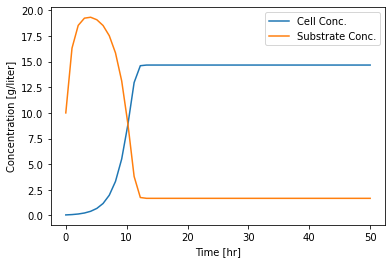

In [11]:
IC = [0.05, 10.0]

t = np.linspace(0,50)
sol = odeint(xdif,IC,t)
X,S = sol.transpose()

plt.plot(t,X)
plt.plot(t,S)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Substrate Conc.'])


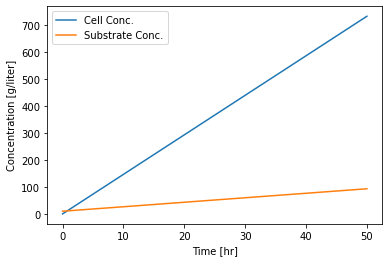

In [12]:
u = np.linspace(0,50)
solprim = odeint(xprim,IC,u)
X,S = solprim.transpose()

plt.plot(u,X)
plt.plot(u,S)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Substrate Conc.'])

In [13]:
# valores de parâmetros

mumax = 1.6   # 1/hora #taxa máxima de crescimento específica
Ks = 1.00     # g/litro #constante de saturação
Yxs2 = 0.3     # g/g #baixo coeficiente de rendimento de biomassa (massa celular/massa do substrato limitante)
Sf = 20.0     # g/litro #concentração do substrato de alimentação (feeding stream)
D = 1.00      # 1/hora #taxa de diluição = F(t)/V

# definição de parâmetros

def mu(S):
    return mumax*S/(Ks + S)

def Rg(X,S):
    return mu(S)*X

# equações diferenciais

def xdif2(x,t):
    X,S = x
    dX = Rg(X,S)-D*X
    dS = D*(Sf - S) - Rg(X,S)/Yxs2
    return [dX,dS]

def xprim2(x,u):
    X,S = x
    X = Yxs2*(Sf-(Ks*D)/(mumax-D))
    S = Ks*D/(mumax-D)
    return [X,S]

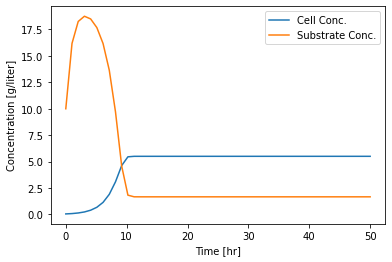

In [14]:
IC = [0.05, 10.0]

t = np.linspace(0,50)
sol2 = odeint(xdif2,IC,t)
X,S = sol2.transpose()

plt.plot(t,X)
plt.plot(t,S)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Substrate Conc.'])

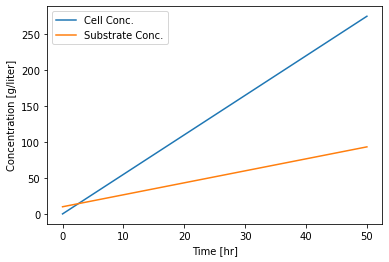

In [17]:
u = np.linspace(0,50)
solprim2 = odeint(xprim2,IC,u)
X,S = solprim2.transpose()

plt.plot(u,X)
plt.plot(u,S)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Substrate Conc.'])